In [75]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import TensorDataset, DataLoader
import numpy as np


In [76]:
dataset=pd.read_csv('EncodedFinalDataset.csv')

In [77]:
dataset.head(3)

,Price,Bedrooms,Bathrooms,Land_Area,Year,Status_For Rent,Status_For Sale,Furnished_No,Furnished_Yes,Address_Addis Ketema,...,Address_Bole,Address_Gullele,Address_Kirkos,Address_Kolfe Keranio,Address_Lemi Kura,Address_Lideta,Address_Nifas Silk-Lafto,Address_Yeka,Property_Type_Apartment,Property_Type_Villa
0,70000.0,1.0,2.0,148.0,2025.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,100000.0,3.0,2.0,148.0,2025.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,31000000.0,5.0,3.0,350.0,2025.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [78]:
dataset.shape

(7659, 22)

In [79]:
# X=dataset[1:]
# Y=dataset[0]


In [80]:
# X[:5,:],Y[:5,:]

In [81]:
dataset=torch.tensor(dataset.values,dtype=torch.float32)
dataset.type

<function Tensor.type>

In [82]:
X=dataset[:,1:]
Y=dataset[:,0]
Y=Y.view(-1,1)


In [83]:
X[:3,:]

tensor([[1.0000e+00, 2.0000e+00, 1.4800e+02, 2.0250e+03, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         1.0000e+00, 1.0000e+00, 0.0000e+00],
        [3.0000e+00, 2.0000e+00, 1.4800e+02, 2.0250e+03, 1.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 1.0000e+00, 0.0000e+00],
        [5.0000e+00, 3.0000e+00, 3.5000e+02, 2.0250e+03, 0.0000e+00, 1.0000e+00,
         1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 1.0000e+00]])

In [84]:
X.shape,Y.shape

(torch.Size([7659, 21]), torch.Size([7659, 1]))

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

(torch.Size([6127, 21]),
 torch.Size([1532, 21]),
 torch.Size([6127, 1]),
 torch.Size([1532, 1]))

In [86]:
mean=X_train.mean(dim=0)
torch.save(mean,"mean.pt")
std=X_train.std(dim=0)
torch.save(std,"std.pt")



In [87]:
X_train=(X_train-mean)/std
X_test=(X_test-mean)/std


In [88]:
Y_mean = Y_train.mean()
Y_std = Y_train.std()
Y_train = (Y_train - Y_mean) / Y_std
Y_test= (Y_test - Y_mean) / Y_std  

In [89]:
mean,std

(tensor([3.0664e+00, 2.5577e+00, 1.9923e+02, 2.0248e+03, 4.4900e-01, 5.5100e-01,
         5.3844e-01, 4.6156e-01, 1.0935e-02, 7.5078e-03, 2.3992e-02, 5.5574e-01,
         2.7746e-03, 6.9692e-02, 1.2241e-02, 6.0715e-02, 1.7627e-02, 4.9127e-02,
         1.8965e-01, 8.6062e-01, 1.3938e-01]),
 tensor([2.0620e+00, 1.5786e+00, 2.6714e+02, 4.2303e-01, 4.9743e-01, 4.9743e-01,
         4.9856e-01, 4.9856e-01, 1.0401e-01, 8.6328e-02, 1.5304e-01, 4.9692e-01,
         5.2606e-02, 2.5465e-01, 1.0997e-01, 2.3883e-01, 1.3160e-01, 2.1615e-01,
         3.9206e-01, 3.4637e-01, 3.4637e-01]))

In [90]:
X_train.mean(dim=0),X_train.std(dim=0)


(tensor([ 2.9885e-08,  3.1753e-08, -2.4904e-09,  1.2215e-04, -1.9612e-08,
          1.9612e-08, -1.5565e-08,  3.9535e-08, -2.9885e-08, -1.5487e-08,
         -1.4787e-08, -9.3391e-10, -6.3039e-09, -2.4904e-08, -5.6034e-09,
          2.7395e-08,  1.8678e-08,  2.4904e-08,  5.0742e-08,  3.5488e-08,
         -1.4943e-08]),
 tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
         1.0000, 1.0000, 1.0000]))

In [91]:
X_train.shape

torch.Size([6127, 21])

In [92]:
class RevoNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
       
        self.fc1 = nn.Linear(21, 512) 
        self.fc2Seq = nn.Sequential(
            nn.Linear(512, 256),
            nn.ReLU(), 
            nn.BatchNorm1d(256), 
            nn.Dropout(0.3),
            nn.Linear(256, 128), 
            nn.ReLU(), 
            nn.BatchNorm1d(128), 
            nn.Dropout(0.3),
            nn.Linear(128, 64), 
            nn.ReLU(), 
            nn.BatchNorm1d(64),
            nn.Linear(64, 32), 
            nn.ReLU()
        )
        # Adding a dropout layer
        self.dropout = nn.Dropout(0.3)
        self.fc6 = nn.Linear(32, 1)  
  
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2Seq(x)
        x = self.fc6(x)  
        return x

      
        
    def forward(self,x):
        x=self.fc1(x)
        x=self.fc2Seq(x)
        x=self.dropout(x)
        x=self.fc6(x)
       
        return x


In [93]:
model=RevoNeuralNetwork()


In [94]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.0001,weight_decay=1e-5)
lossfun = nn.L1Loss()


Epoch 0:
Train Loss: 0.2654, Train MAE: 0.2654
Test Loss: 0.1213, Test MAE: 0.1213
Epoch 10:
Train Loss: 0.1414, Train MAE: 0.1414
Test Loss: 0.0825, Test MAE: 0.0825
Epoch 20:
Train Loss: 0.1245, Train MAE: 0.1245
Test Loss: 0.0753, Test MAE: 0.0753
Epoch 30:
Train Loss: 0.1222, Train MAE: 0.1222
Test Loss: 0.0704, Test MAE: 0.0704
Epoch 40:
Train Loss: 0.1135, Train MAE: 0.1135
Test Loss: 0.0684, Test MAE: 0.0684
Epoch 50:
Train Loss: 0.1106, Train MAE: 0.1106
Test Loss: 0.0657, Test MAE: 0.0657
Epoch 60:
Train Loss: 0.1072, Train MAE: 0.1072
Test Loss: 0.0673, Test MAE: 0.0673
Epoch 70:
Train Loss: 0.1039, Train MAE: 0.1039
Test Loss: 0.0643, Test MAE: 0.0643
Epoch 80:
Train Loss: 0.1036, Train MAE: 0.1036
Test Loss: 0.0637, Test MAE: 0.0637
Epoch 90:
Train Loss: 0.1004, Train MAE: 0.1004
Test Loss: 0.0631, Test MAE: 0.0631
Epoch 100:
Train Loss: 0.0997, Train MAE: 0.0997
Test Loss: 0.0622, Test MAE: 0.0622
Epoch 110:
Train Loss: 0.0980, Train MAE: 0.0980
Test Loss: 0.0606, Test MAE

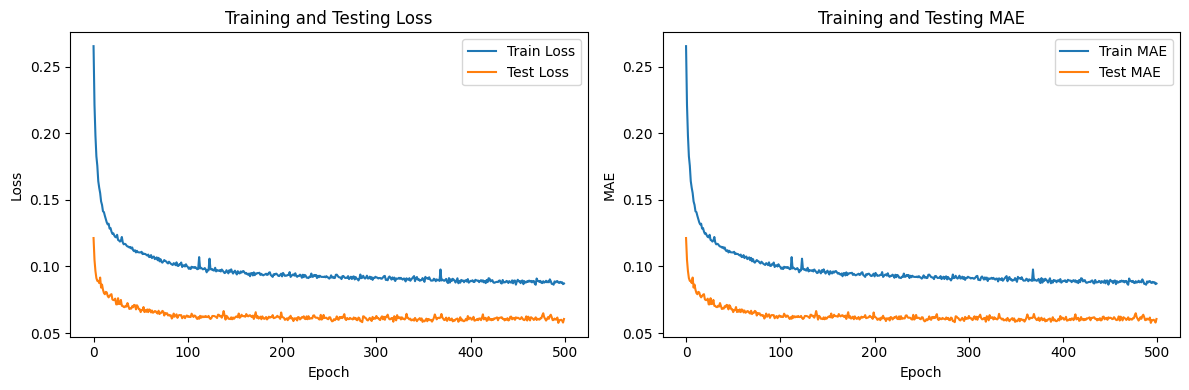


Final Results:
Final Train Loss: 0.0872
Final Test Loss: 0.0606
Final Train MAE: 0.0872
Final Test MAE: 0.0606


In [95]:
trainLossavg = []
testLoss = []
trainMAEavg = []  
testMAE = [] 

train_dataset = TensorDataset(X_train, Y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True) 



for epoch in range(500):
    batchLoss = []
    batchMAE= []

    # Training phase
    for X_train, Y_train in train_loader:

        model.train()
        y_pred = model(X_train)
        loss = lossfun(y_pred, Y_train)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Calculate training MAE
        batch_mae = torch.mean(torch.abs(y_pred - Y_train)).item()
        batchLoss.append(loss.item())
        batchMAE.append(batch_mae)
    trainLossavg.append(np.mean(batchLoss))
    trainMAEavg.append(np.mean(batchMAE))
    
    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test)
        test_loss = lossfun(y_pred_test, Y_test)
        test_mae = torch.mean(torch.abs(y_pred_test - Y_test)).item()
        testLoss.append(test_loss.item())
        testMAE.append(test_mae)
    
    if epoch % 10 == 0:
        print(f'Epoch {epoch}:')
        
        print(f'Train Loss: {trainLossavg[-1]:.4f}, Train MAE: {trainMAEavg[-1]:.4f}')
        print(f'Test Loss: {test_loss.item():.4f}, Test MAE: {test_mae:.4f}')

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(trainLossavg, label='Train Loss')
plt.plot(testLoss, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Testing Loss')

plt.subplot(1, 2, 2)
plt.plot(trainMAEavg, label='Train MAE')
plt.plot(testMAE, label='Test MAE')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()
plt.title('Training and Testing MAE')
plt.tight_layout()
plt.show()

print("\nFinal Results:")
print(f"Final Train Loss: {trainLossavg[-1]:.4f}")
print(f"Final Test Loss: {testLoss[-1]:.4f}")
print(f"Final Train MAE: {trainMAEavg[-1]:.4f}")
print(f"Final Test MAE: {testMAE[-1]:.4f}")

In [96]:
X_test.shape

torch.Size([1532, 21])

In [ ]:
raw_input = [3.0,2.0,200.0,2024.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0]
input=[2.0,2.0,148.0,2024.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0]

input_tensor = torch.tensor(raw_input, dtype=torch.float32).unsqueeze(0)  # Shape: (1, 22)



input_tensor_scaled = (input_tensor - mean) / std

model.eval() 
with torch.no_grad():
    y_pred = model(input_tensor_scaled)
    y_pred_raw = (y_pred.item() * Y_std) + Y_mean
    print(f'Prediction: {y_pred_raw}')  # Use .item() if single value

Prediction: 12110527.0


In [98]:
#Prediction: 16146325.0
# Prediction: 19755266.0
#Prediction: 14586225.0